In [1]:
!wget -r -np -nH --reject "index.html*" --cut-dirs 6 \
 https://krishna.gs.washington.edu/content/members/vagar/Xpresso/data/datasets/pM10Kb_1KTest/

--2022-04-19 01:33:16--  https://krishna.gs.washington.edu/content/members/vagar/Xpresso/data/datasets/pM10Kb_1KTest/
Resolving krishna.gs.washington.edu (krishna.gs.washington.edu)... 128.208.8.136
Connecting to krishna.gs.washington.edu (krishna.gs.washington.edu)|128.208.8.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1403 (1.4K) [text/html]
Saving to: ‘pM10Kb_1KTest/index.html.tmp’

pM10Kb_1KTest/index 100%[===================>]   1.37K  --.-KB/s    in 0s      

2022-04-19 01:33:17 (64.8 MB/s) - ‘pM10Kb_1KTest/index.html.tmp’ saved [1403/1403]

Loading robots.txt; please ignore errors.
--2022-04-19 01:33:17--  https://krishna.gs.washington.edu/robots.txt
Reusing existing connection to krishna.gs.washington.edu:443.
HTTP request sent, awaiting response... 404 Not Found
2022-04-19 01:33:17 ERROR 404: Not Found.

Removing pM10Kb_1KTest/index.html.tmp since it should be rejected.

--2022-04-19 01:33:17--  https://krishna.gs.washington.edu/content/members

In [2]:
!pip install 'h5py==2.10.0' --force-reinstall

# Click "RESTART RUNTIME" after installation

     |████████████████████████████████| 2.9 MB 5.3 MB/s 
     |████████████████████████████████| 15.7 MB 33.0 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible

In [1]:
%tensorflow_version 1.x

import pandas as pd
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, Model
import matplotlib.pyplot as plt

from math import *
from tensorflow import keras

from tensorflow import keras
from keras.models import Model, load_model
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam, SGD
from keras.layers import *
from keras.metrics import *
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from hyperopt import hp, STATUS_OK

TensorFlow 1.x selected.


Using TensorFlow backend.


In [2]:
import h5py
import os
datadir="pM10Kb_1KTest"
trainfile = h5py.File(os.path.join(datadir, 'train.h5'), 'r')
X_trainhalflife, X_trainpromoter, y_train, geneName_train = trainfile['data'], trainfile['promoter'], trainfile['label'], trainfile['geneName']
validfile = h5py.File(os.path.join(datadir, 'valid.h5'), 'r')
X_validhalflife, X_validpromoter, y_valid, geneName_valid = validfile['data'], validfile['promoter'], validfile['label'], validfile['geneName']
testfile = h5py.File(os.path.join(datadir, 'test.h5'), 'r')
X_testhalflife, X_testpromoter, y_test, geneName_test = testfile['data'], testfile['promoter'], testfile['label'], testfile['geneName']
leftpos = 3000
rightpos = 13500
XTrain = X_trainpromoter[:,leftpos:rightpos,:]
XVal = X_validpromoter[:,leftpos:rightpos,:]
XTest = X_testpromoter[:,leftpos:rightpos,:]
YTrain = y_train
YVal = y_valid
YTest = y_test

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 10500, 4)          0         
_________________________________________________________________
Conv1D_1 (Conv1D)            (None, 10500, 32)         928       
_________________________________________________________________
MaxPool_1 (MaxPooling1D)     (None, 210, 32)           0         
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 210, 16)           3600      
_________________________________________________________________
MaxPool_2 (MaxPooling1D)     (None, 105, 16)           0         
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 105, 8)            904       
_________________________________________________________________
MaxPool_3 (MaxPooling1D)     (None, 52, 8)             0   

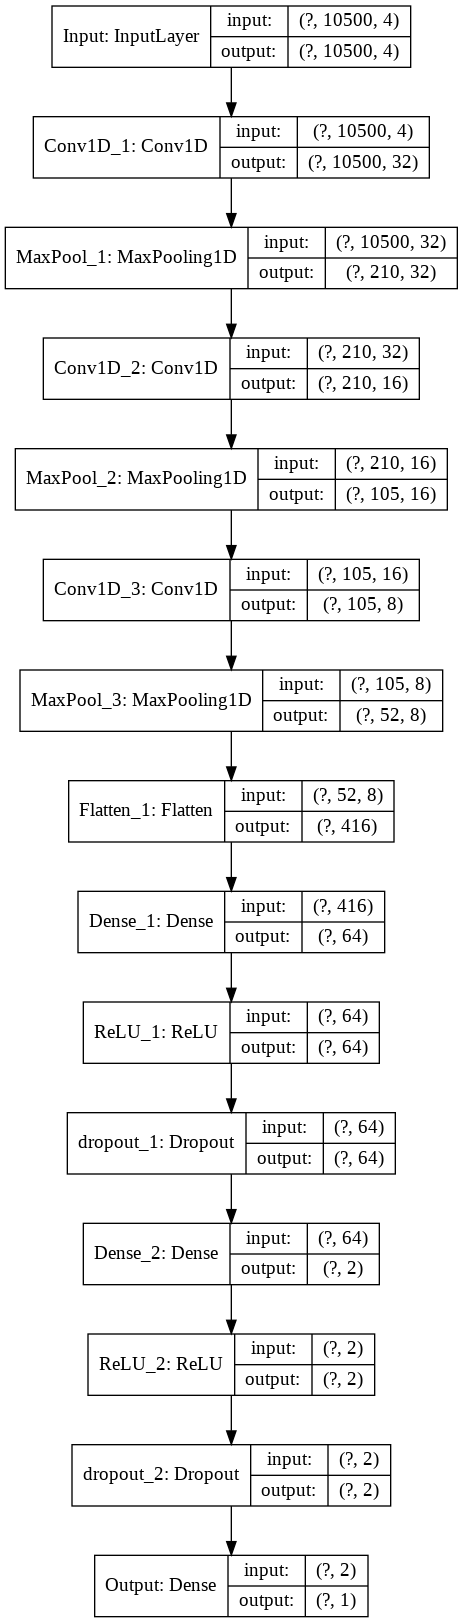

In [4]:
# non CR model
layer_0 = Input(shape=XTrain.shape[1:],name='Input')

layer_1 = Conv1D(32,7,padding='same', kernel_initializer='glorot_normal',activation='relu',name='Conv1D_1')(layer_0)
layer_2 = MaxPool1D(50,name='MaxPool_1')(layer_1)

layer_3 = Conv1D(16,7,padding='same', kernel_initializer='glorot_normal',activation='relu',name='Conv1D_2')(layer_2)
layer_4 = MaxPool1D(2,name='MaxPool_2')(layer_3)

layer_5 = Conv1D(8,7,padding='same', kernel_initializer='glorot_normal',activation='relu',name='Conv1D_3')(layer_4)
layer_6 = MaxPool1D(2,name='MaxPool_3')(layer_5)

layer_7 = Flatten(name='Flatten_1')(layer_6)

layer_8 = Dense(64,name='Dense_1')(layer_7)
layer_9 = ReLU(name='ReLU_1')(layer_8)
layer_10 = Dropout(0.00099,name='dropout_1')(layer_9)

layer_11 = Dense(2,name='Dense_2')(layer_10)
layer_12 = ReLU(name='ReLU_2')(layer_11)
layer_13 = Dropout(0.00099,name='dropout_2')(layer_12)

layer_14 = Dense(1,name='Output')(layer_13)
model = Model(inputs=layer_0,outputs=layer_14)

#layer_14 = Dense(52*8,kernel_regularizer=tf.keras.regularizers.l1(0.0001),name='Contextual_Weight')(layer_13)
#layer_15 = Flatten(name='Flatten_2')(layer_6)
#layer_16 = Multiply(name='Multiply')([layer_14,layer_15])

#layer_17 = Dense(1,kernel_initializer='ones',use_bias=False,name='Sum')(layer_16)
#layer_18 = Dense(1,name='Output')(layer_17)
#model = Model(inputs=layer_0,outputs=layer_18)
#model.layers[17].trainable = False
model.summary()
keras.utils.plot_model(model, "non-CR-model.png", show_shapes=True)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              (None, 10500, 4)     0                                            
__________________________________________________________________________________________________
Conv1D_1 (Conv1D)               (None, 10500, 32)    928         Input[0][0]                      
__________________________________________________________________________________________________
MaxPool_1 (MaxPooling1D)        (None, 210, 32)      0           Conv1D_1[0][0]                   
__________________________________________________________________________________________________
Conv1D_2 (Conv1D)               (None, 210, 16)      3600        MaxPool_1[0][0]                  
____________________________________________________________________________________________

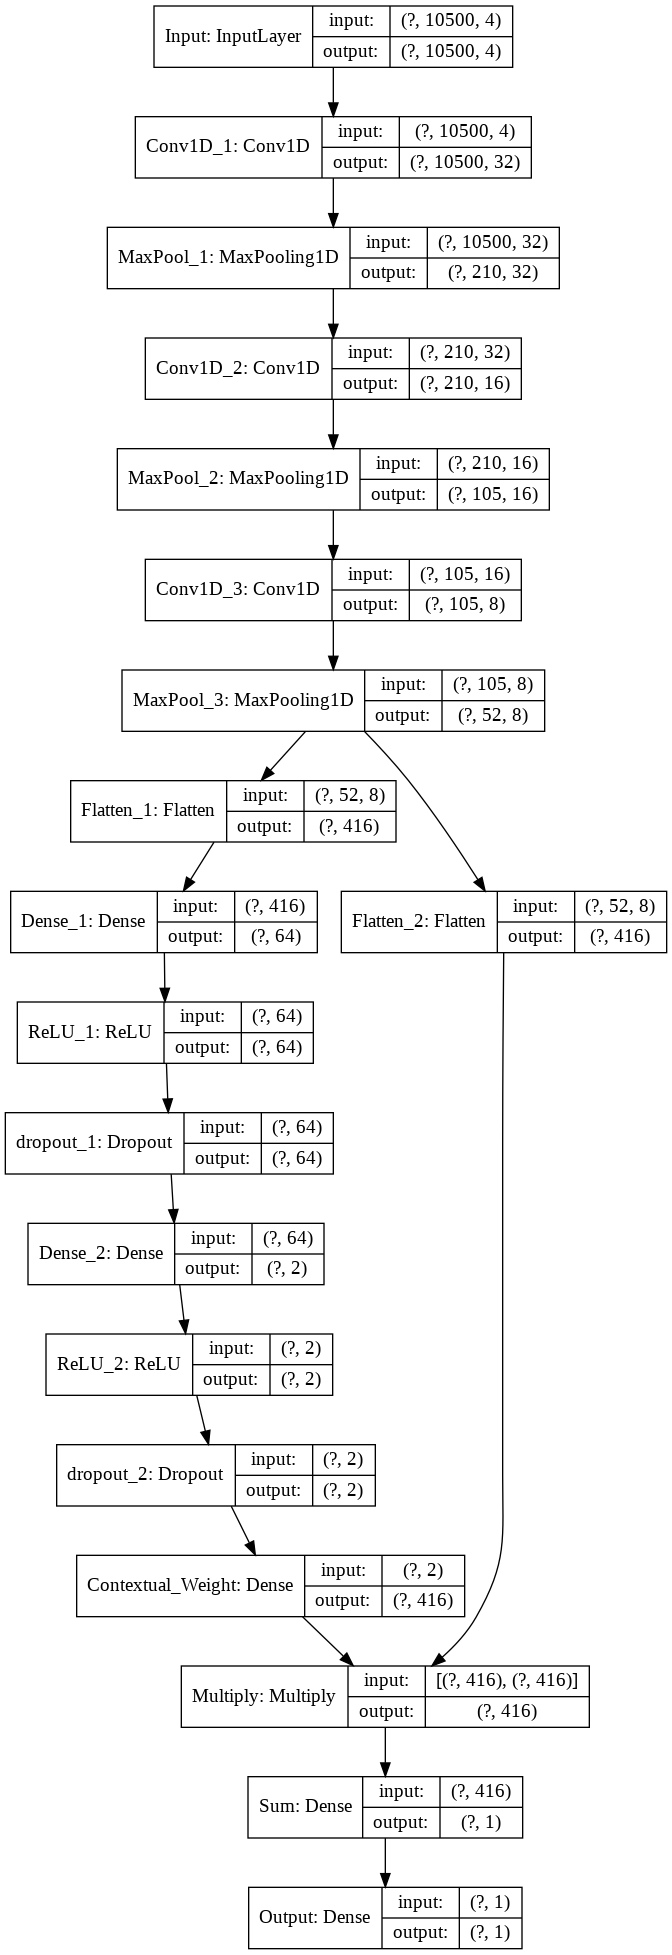

In [5]:
# CR model
layer_0 = Input(shape=XTrain.shape[1:],name='Input')

layer_1 = Conv1D(32,7,padding='same', kernel_initializer='glorot_normal',activation='relu',name='Conv1D_1')(layer_0)
layer_2 = MaxPool1D(50,name='MaxPool_1')(layer_1)

layer_3 = Conv1D(16,7,padding='same', kernel_initializer='glorot_normal',activation='relu',name='Conv1D_2')(layer_2)
layer_4 = MaxPool1D(2,name='MaxPool_2')(layer_3)

layer_5 = Conv1D(8,7,padding='same', kernel_initializer='glorot_normal',activation='relu',name='Conv1D_3')(layer_4)
layer_6 = MaxPool1D(2,name='MaxPool_3')(layer_5)

layer_7 = Flatten(name='Flatten_1')(layer_6)

layer_8 = Dense(64,name='Dense_1')(layer_7)
layer_9 = ReLU(name='ReLU_1')(layer_8)
layer_10 = Dropout(0.00099,name='dropout_1')(layer_9)

layer_11 = Dense(2,name='Dense_2')(layer_10)
layer_12 = ReLU(name='ReLU_2')(layer_11)
layer_13 = Dropout(0.00099,name='dropout_2')(layer_12)

layer_14 = Dense(52*8,kernel_regularizer=tf.keras.regularizers.l1(0.0001),name='Contextual_Weight')(layer_13)
layer_15 = Flatten(name='Flatten_2')(layer_6)
layer_16 = Multiply(name='Multiply')([layer_14,layer_15])

layer_17 = Dense(1,kernel_initializer='ones',use_bias=False,name='Sum')(layer_16)
layer_18 = Dense(1,name='Output')(layer_17)
model = Model(inputs=layer_0,outputs=layer_18)
model.layers[17].trainable = False
model.summary()
keras.utils.plot_model(model, "CR-model.png", show_shapes=True)

In [7]:
model.compile(SGD(lr=0.0005, momentum=0.9),'mean_squared_error', metrics=['mean_squared_error'])
earlystop_cb = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min')
check_cb = ModelCheckpoint('bestparams.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
result = model.fit(XTrain, YTrain, batch_size=128, shuffle="batch", epochs=100,
        validation_data=[XVal, YVal], callbacks=[earlystop_cb, check_cb])
mse_history = result.history['val_mean_squared_error']

Train on 16377 samples, validate on 1000 samples
Epoch 1/100
16377/16377 [==============================] - 11s 646us/step - loss: 0.9934 - mean_squared_error: 0.9883 - val_loss: 1.0124 - val_mean_squared_error: 1.0073

Epoch 00001: val_loss improved from inf to 1.01244, saving model to bestparams.h5
Epoch 2/100
16377/16377 [==============================] - 10s 619us/step - loss: 0.9557 - mean_squared_error: 0.9505 - val_loss: 0.9726 - val_mean_squared_error: 0.9675

Epoch 00002: val_loss improved from 1.01244 to 0.97259, saving model to bestparams.h5
Epoch 3/100
16377/16377 [==============================] - 10s 617us/step - loss: 0.8365 - mean_squared_error: 0.8314 - val_loss: 0.7761 - val_mean_squared_error: 0.7709

Epoch 00003: val_loss improved from 0.97259 to 0.77605, saving model to bestparams.h5
Epoch 4/100
16377/16377 [==============================] - 10s 619us/step - loss: 0.7308 - mean_squared_error: 0.7256 - val_loss: 0.7066 - val_mean_squared_error: 0.7015

Epoch 00004: 

In [8]:
#best_file = 'bestparams/CR-1_bestparams.h5'
best_file = 'bestparams.h5'
model = load_model(best_file)
YTrain_Pred = model.predict(XTrain)
print('Correlation of training dataset: '+str(np.corrcoef(YTrain[:].transpose(),YTrain_Pred.transpose())[0,1]))
YVal_Pred = model.predict(XVal)
print('Correlation of training dataset: '+str(np.corrcoef(YVal[:].transpose(),YVal_Pred.transpose())[0,1]))
YTest_Pred = model.predict(XTest)
print('Correlation of training dataset: '+str(np.corrcoef(YTest[:].transpose(),YTest_Pred.transpose())[0,1]))

Correlation of training dataset: 0.7537055251777599
Correlation of training dataset: 0.7214160843915537
Correlation of training dataset: 0.7222889399896402
